In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
%matplotlib inline

### 통계 문제 연습 

scipy.stats 의 binom, norm 등의 툴을 이용해서 풀어보세요.  

#### 1.	김포국제공항에서 비행기 승객이 짐을 수화물로 보낼 확률은 70%이고 서로 독립이라고 가정하자. 16명의 승객이 김포국제공항에서 대기하고 있다. 다음의 확률을 계산하라.

#### (a) 16명 승객 모두 짐을 수화물로 보낼 확률

In [3]:
from scipy.stats import binom
binom.pmf(16, n=16, p=0.7)

0.0033232930569600965

#### (b) 10명 미만의 승객이 짐을 수화물로 보낼 확률

In [4]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
binom.pmf(np.arange(0,10), n=16, p=0.7)

array([4.30467210e-09, 1.60707758e-07, 2.81238577e-06, 3.06237562e-05,
       2.32230151e-04, 1.30048885e-03, 5.56320229e-03, 1.85440076e-02,
       4.86780200e-02, 1.00961819e-01])

In [4]:
sum(binom.pmf(np.arange(0,10), n=16, p=0.7))

0.17531336930687574

In [5]:
#cdf : cumulative distribution function = P(X<x)
binom.cdf(9, n=16, p=0.7)

0.17531336930687563

#### (c) 16명의 승객을 무작위로 추출하여 그 중 짐을 수화물로 보내는 승객의 수를 세는 실험을 1000번 하는 상황을 시뮬레이션 하여 그 데이터의 히스토그램을 그리시오. 

힌트) binorm.rvs를 사용하면 여러 번의 실험 결과를 확인할 수 있습니다. document 등을 확인하여 이용해보세요!!

In [6]:
np.random.seed(0)

In [7]:
data = binom.rvs(16, 0.7, size=1000)

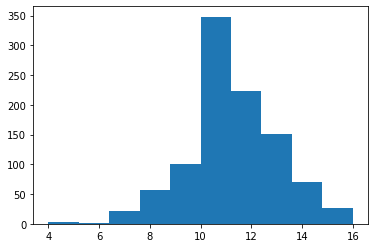

In [9]:
plt.hist(data)
plt.show()

#### (d) 위의 시뮬레이션 데이터의 평균과 분산은 무엇인가? 이는 이론적인 기대값, 분산과 일치하는가?

In [10]:
np.mean(data), np.var(data)

(11.207, 3.422151000000001)

In [13]:
#이론적인 평균
16*0.7

11.2

In [12]:
#이론적인 분산
16*0.7*0.3

3.36

#### 2. 콜로라도에서 잡히는 송어의 길이는 정규분포를 따르고 평균이 12.5인치이고 표준편차는 1.2인치이다. 
#### (a) 11 인치 이하의 송어는 잡히더라도 방류해 주어야 하는 규정을 만든다면 잡히는 송어의 몇 %가 방류되겠는가? 

In [14]:
# N(12.5, 1.2^2)
from scipy.stats import norm
norm.cdf(11, loc=12.5, scale=1.2)

0.10564977366685535

In [25]:
#오른쪽 꼬리 기준
1 - norm.cdf(11, loc=12.5, scale=1.2)

0.8943502263331446

#### (b) 잡히는 송어의 80%를 집에 가져가고 나머지는 다시 방류하게 하려면, 담당 부서에서 허용하는 최소 송어의 길이는?

In [16]:
norm.ppf(0.20, loc=12.5, scale=1.2) #왼쪽 꼬리가 0.2가 되는 x값

11.490054519712503

In [26]:
norm.ppf(0.8, loc=12.5, scale=1.2) #오른쪽 꼬리가 0.2가 되는 x값

13.509945480287497

#### (c) 무작위로 잡은 100마리의 송어 길이를 시뮬레이션 하여 그 데이터의 히스토그램을 그리시오. 그 데이터의 평균과 표준편차를 계산하시오.

힌트) binorm.rvs를 사용하면 여러 번의 실험 결과를 확인할 수 있습니다. document 등을 확인하여 이용해보세요!!

In [22]:
np.random.seed(0)
data = norm.rvs(size=1000, loc=12.5, scale=1.2)

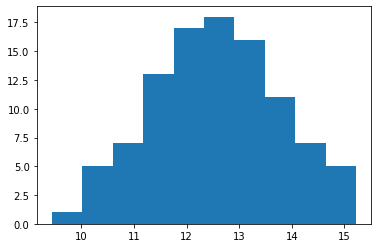

In [23]:
plt.hist(data)
plt.show()

In [24]:
np.mean(data), np.std(data)

(12.571769618641378, 1.2094586936598957)

### 베이지안 연습

##### 1. 벤처기업의 성공 확률은 10%로 조사되었다. 성공한 벤처기업 중 신용평가 기관으로부터 투자심사를 통해 투자를 받은 경우는 85%, 실패한 벤처기업 중 투자가 기각된 경우는 75%로 조사되었다. 신용평가 기관에서 임의의 벤처기업에 투자하였을 때, 해당 벤처기업이 성공할 확률은 무엇인가?  

In [1]:
A : 성공  
B : 투자 
A의 여집합: 실패
p(A):0.1 
p(Ac)= 0.9 
p(B | A) = 0.85
p(Bc | Ac) = 0.75

SyntaxError: invalid syntax (<ipython-input-1-83784dce8798>, line 3)

In [ ]:
p(B | Ac) = p(Ac n B) / p(Ac)

In [ ]:
p(AnB) = 0.85 * 0.1
p(AcnB) = 0.25 * 0.9

In [4]:
#p(B) = p(AnB) + p(Ac nB)
(0.85 * 0.1) +(0.25*0.9)

0.31

In [ ]:
p (A|B) = p(AnB) / p(b)

In [2]:
0.085/0.31

0.2741935483870968

##### 2. 소독약의 곰팡이 처리효과는 0.2 또는 0.3으로 알려져 있으나, Label이 지워져서 어느 것인지 구분되지 않으나, 실험실 처리과정에서 5번 실험 중 2번이 효과가 있었다. 소독약 처리효과는 0.2 또는 0.3 중 어느 것인가? 

알려진 것은 p(x|a)와 p(x|ac)  
a 는 0.2, ac는 0.3이라고 할 때   
p(?|x)를 찾는 것.  

In [27]:
#X|A
a = 0.2**2
b = 0.8**3
10*a*b
#10 = 5C2

0.2048000000000001

In [28]:
#X|Ac
a = 0.3**2
b = 0.7**3
10*a*b

0.3086999999999999

In [ ]:
p(A(0.2)) = 0.5
p(Ac(0.3)) = 0.5

In [6]:
# X
0.2048*0.5+0.3087*0.5

0.25675

In [7]:
#A교X
0.2048*0.5

0.1024

In [8]:
#p(A(0.2)|x)
0.1024/0.25675

0.39883154819863686

In [29]:
#p(Ac(0.3)/x)
1 - 0.39

0.61

따라서 소독약은 0.3

##### 3. 3개 공장에서 제품을 생산하는데, 각 공장 1일 생산량은 제1공장 100단위, 제2공장 50단위, 제3공장 80단위 이다. 제품 불량률은 제1공장 3%, 제2공장 2.5%, 제3공장 2.1%로 조사되었다. 임의의 제품이 불량품으로 판정되었다. 그 불량품이 제1공장에서 생산된 제품일 확률은 얼마인가?

In [10]:
30/1000

0.03

In [12]:
p(불량|1공장) = 0.03
p(불량|2공장) = 0.025
p(불량|3공장) = 0.021
p(1공장) = 100/230
p(2공장) = 50/230
p(3공장) = 80/230
p(불량) = p(불량|1공장)*p(1공장) + p(불량|2공장)* p(2공장) + p(불량|3공장) * p(3공장)
p(1공장|불량) = (p(불량|1공장)*p(1공장)) / p(불량)

SyntaxError: invalid syntax (<ipython-input-12-df54592f8323>, line 4)

In [20]:
a = (0.03*(100/230)) + (0.025* (50/230)) + (0.021 * (80/230))
(0.03*(100/230))/a

0.5059021922428331

#### 4. 몬티홀 문제  

A,B,C 3개의 Room이 있으며, 3개의 Room 중에서 1개에만 상금이 놓여 있다. 게임은 도전자가 임의로 Room 1개를 선택하면 사회자는 남은 2개의 Room 중에서 비어진 하나의 Room을 보여준다. 그리고 도전자에게 선택을 유지할 것인가, 바꿀 것인가를 묻는다. 이 때 도전자에게 유리한 의사결정은 무엇인지 아래의 질문을 통해 답하시오. 
     
   - 가설
        - H1: 도전자가 선택한 Room(A라 한다)에 상금 존재
        - H2: Open된 Room(B라 한다)에 상금 존재
        - H3: 남은 Room(C라 한다)에 상금 존재  
          
   - 관측 데이터 
     
        - 사회자가 Room B를 Open   
        
        
   - 가설 1,2,3에 대한 사전분포는 동일하게 1/3로 가정한다. 즉, P(H1)=P(H2)=P(H3)=1/3이다.  
    
    
##### (1) P(D|H1) 즉, 상금이 Room A에 존재할 때 사회자가 Room B를 Open할 확률을 구하시오. 

In [ ]:
상금 A 
B 오픈? -> 1/2

##### (2) 위의 (1)과 비슷하게 P(D|H2), P(D|H3)을 구하시오.

In [ ]:
상금 B
B 오픈 -> 0
상금 C 
B 오픈 -> 1

##### (3) 사회자가 Room B를 Open 했을 때 상금이 A에 존재할 확률, P(H1|D),과 상금이 C에 존재할 확률, P(H3|D),을 계산하시오. 계산 결과를 바탕으로 도전자에게 유리할 의사결정이 무엇인지 답하시오.`

In [ ]:
P(H1 n D) = p(D|H1) * p(H1)   = 1/2 * 1/3
P(H2 n D) = 0
P(H3 n D) = 1* 1/3 
p(D) = 1/6 + 1/3 = 1/2
p(H1|D) = (1/6) / (1/2) = 1/3
p(H3|D) = (1/3) / (1/2)  = 2/3
따라서 룸 C로 변경하는 것이 유리한 선택!